<a href="https://colab.research.google.com/github/LeonardoNerydeSouza/Deep-Learning-/blob/master/P1T5_Titanic_Arboles_Dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic (con datos nulos = 0)

##1. Cargar librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier #clase de árboles de decisión 
from sklearn.datasets import load_iris

##2. Cargar DataSet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wFx6QclydXu9LJ9qvtIgMSDllTXwGfRF0JAbd4-Tj1nmV3cIIdHqUw
Mounted at /content/drive


In [ ]:
df=pd.DataFrame
df=pd.read_csv('/content/drive/My Drive/Deep learning/dataset_titanic.csv', encoding='utf-8')

##3. Explorar datos

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Se debe tener en cuenta: 
*   Survived: 0=No, 1=Yes
*   Sex: 0=male, 1=female
*   PClass: Ticket class
*   Sibs: número de hermanos/ conyuges
*   Parch: número de padres/ hijos a bordo
*   Embarked: C=Cherbourg, Q=QueenStown S=Southampton 







###Se cuenta número de registros del dataset

In [ ]:
df.shape

(891, 12)

El DataSet tiene 891 filas y 12 columnas; es decir, tiene 12 características y 891 registros.

###Se verifica si existen datos nulos

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Si existen datos nulos, en total existen 866 valores nulos. En este caso, vamos a predecir los valores nulos. Se crearán dos bloques: uno con valores nulos y el otro sin ellos y se entrenarán.

Se cambian los valores que están en formato texto a numérico

In [ ]:
df.replace({"male":0,"female":1,'C':1,'Q':2,'S':3},inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,3.0


Se crea la estructura y se entrena el modelo

In [ ]:
#Crear DataSet con características seleccionadas
titanic_data= pd.DataFrame({"Survived":df["Survived"],"Pclass":df["Pclass"],"Sex":df["Sex"],
              "Age":df["Age"],"SibSp":df["SibSp"],"Parch":df["Parch"],"Fare":df["Fare"],"Embarked":df["Embarked"]})
data_set_not_null=titanic_data.drop(titanic_data[titanic_data.Age.isnull()].index)
data_set_not_null.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,3.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,3.0
3,1,1,1,35.0,1,0,53.1000,3.0
4,0,3,0,35.0,0,0,8.0500,3.0


In [ ]:
car=["Survived","Pclass","Sex","SibSp","Parch","Fare"]
y=data_set_not_null["Age"]
x=data_set_not_null[car]
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Ahora se realiza la predicción para la edad

In [ ]:
X=titanic_data[car]
predict=model.predict(X)

Se sustituyen los valores encontrados en el dataframe original

In [ ]:
titanic_data.fillna(0, inplace=True) #fue NECESARIO el inplace
#titanic_data.Age.fillna(predict)
#titanic_data.loc[(titanic_data.Age.isnull(), "Age"]=predict

Verificamos si existen datos nulos

In [ ]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

###Graficar comparaciones

**SOBREVIVIENTES VS NO-SOBREVIVIENTES**

Text(0.5, 1.0, 'Sobrevivientes VS No-Sobrevivientes')

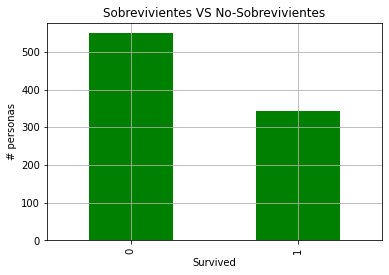

In [ ]:
surv = titanic_data.groupby(['Survived']).size()
surv.plot.bar(color='green').grid(True)
plt.ylabel("# personas")
plt.title("Sobrevivientes VS No-Sobrevivientes")

**HOMBRES VS MUJERES QUE SOBREVIVIERON**

Text(0.5, 1.0, 'Género VS Supervivencia')

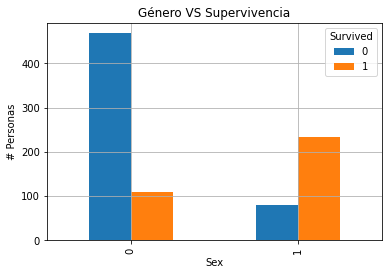

In [ ]:
gender_surv = pd.crosstab(titanic_data['Sex'],titanic_data['Survived'])
gender_surv.plot.bar().grid(True)
plt.ylabel("# Personas")
plt.title("Género VS Supervivencia")

#gender_surv=titanic_data.groupby(['Survived','Sex']).size()
#gender_surv.plot.bar(color='blue').grid(True)

Género -> 0=male, 1=female
¿Sobrevivieron? -> 0=No, 1=Yes

**SOBREVIVIENTES POR EDAD (HISTOGRAMA)**

Text(0.5, 1.0, 'Sobrevivientes por Edad')

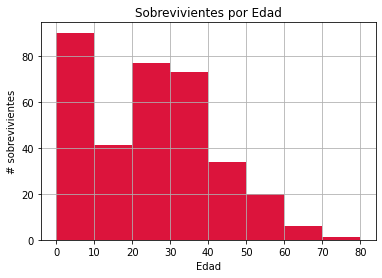

In [ ]:
Sur_Age = titanic_data.Age[titanic_data.Survived==1]
Sur_Age.plot(kind="hist", color="crimson",bins=8).grid(True)
plt.xlabel("Edad")
plt.ylabel("# sobrevivientes")
plt.title("Sobrevivientes por Edad")

**¿CÓMO ESTABAN DISTRIBUIDOS LOS PASAJEROS POR CLASE?**

**CLASE VS SOBREVIVIENTES (HISTOGRAMA)**

Text(0.5, 1.0, 'Clase VS Sobrevivientes')

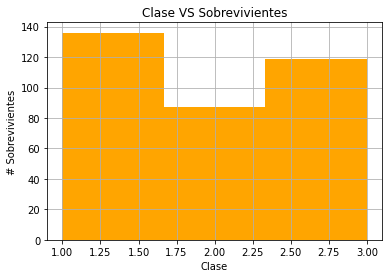

In [ ]:
Pclass_Sup = titanic_data.Pclass[titanic_data.Survived==1]
Pclass_Sup.plot(kind="hist", color="orange", bins=3).grid(True)
plt.xlabel("Clase")
plt.ylabel("# Sobrevivientes")
plt.title("Clase VS Sobrevivientes")

##4. Separar datos

In [ ]:
feature_names=["Pclass","Sex","SibSp","Parch","Fare","Embarked"]
x_train, x_test, y_train, y_test = train_test_split(titanic_data[feature_names],titanic_data['Survived'],
                                                    random_state=2)

##5.Crear instancia de algoritmo

In [ ]:
arbol =DecisionTreeClassifier(max_depth=2, random_state=0)

##6.Entrenar algoritmo

In [ ]:
arbol.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

##7.Predecir valores

In [ ]:
print(x_test.iloc[0])
print(y_test.iloc[0])

Pclass       1.0000
Sex          0.0000
SibSp        0.0000
Parch        0.0000
Fare        26.2875
Embarked     3.0000
Name: 707, dtype: float64
1


**Se hace predicción**

In [ ]:
arbol.predict(x_test.iloc[0:10])

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

##8.Calcular exactitud 

In [ ]:
accuracy=arbol.score(x_test,y_test)
print(accuracy)

0.7488789237668162


##9.Graficar árbol

In [ ]:
class_name_list = list(['no_sobrevive','sobrevive'])
from sklearn.tree import export_graphviz   #importar para raficar el árbol
from pydotplus import graph_from_dot_data #convierte datos que estan en la variables arbol
dot_data = export_graphviz(arbol, feature_names=feature_names, class_names=class_name_list)
grafico=graph_from_dot_data(dot_data)
grafico.write_png('arbol_surv.png')

True

##10.¿Optimizar el árbol?

Al visualiza el árbol generado, podemos evidenciar que debe tener más profundidad, ya que con unaprofundidad 2 solo tienen una probabilidad del 75% 

In [ ]:
df_importancia = pd.DataFrame({"característica": x_train.columns, "Importancia":arbol.feature_importances_})
df_importancia = df_importancia.sort_values("Importancia",ascending=False)
df_importancia.head()

,característica,Importancia
1,Sex,0.692764
0,Pclass,0.211268
4,Fare,0.095967
2,SibSp,0.000000
3,Parch,0.000000


**Probar diferentes profundidades**

In [ ]:
depth_list=list(range(1,10))
accuracy_list=[]
for depth in depth_list:
  arbol=DecisionTreeClassifier(max_depth=depth, random_state=0)
  arbol.fit(x_train,y_train)
  score=arbol.score(x_test,y_test)
  accuracy_list.append(score)

**Graficar resultado**

<function matplotlib.pyplot.show>

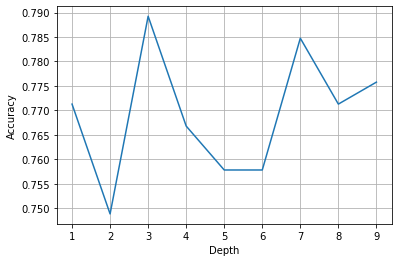

In [ ]:
plt.plot(depth_list,accuracy_list)
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.grid(True)
plt.show

La mejor probabilidad se obtiene con la profundidad 3 

#Titanic (clase-con valores nulos eliminados)

##1.Importar librerías


In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##2.Cargar Dataset

In [ ]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databaset_para_trabajar_sklearn/dataset_titanic.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##3.Conociendo datos

In [ ]:
#nombres de columnas
df_titanic.columns
#mostrar estadisticas del dataset
df_titanic.describe()
#conocer valores nulos
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##4.Graficando datos


0    0.616162
1    0.383838
Name: Survived, dtype: float64


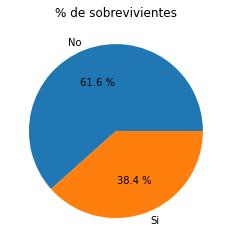

In [ ]:
#grafica de torta para sobrevivientes (si/no)
datos = df_titanic.Survived.value_counts(normalize=True)
print(datos)
plt.pie(datos, labels=["No","Si"],autopct="%0.1f %%")
plt.title("% de sobrevivientes")
plt.show()

female    0.681287
male      0.318713
Name: Sex, dtype: float64


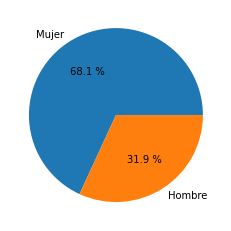

In [ ]:
#sobrevivientes vs sexo (Male / Female)
datos= df_titanic.Sex[df_titanic.Survived==1].value_counts(normalize=True)
print(datos)
plt.pie(datos,labels=["Mujer","Hombre"],autopct="%0.1f %%")
plt.show()

1    0.397661
3    0.347953
2    0.254386
Name: Pclass, dtype: float64


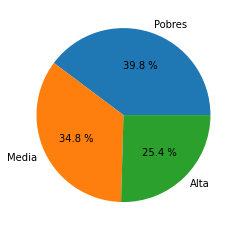

In [ ]:
#sobrevivientes por clase (3, 2,1)
datos= df_titanic.Pclass[df_titanic.Survived==1].value_counts(normalize=True)
print(datos)
plt.pie(datos,labels=["Pobres","Media","Alta"],autopct="%0.1f %%")
plt.show()

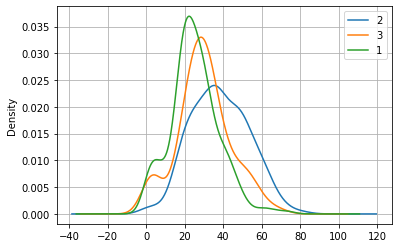

In [ ]:
# clases vs edad
for t_class in [1,2,3] :
  df_titanic.Age[df_titanic.Pclass==t_class].plot(kind="kde")
plt.legend({"1","2","3"})
plt.grid()
plt.show()

##5.Normalizando datos


###Eliminado columnas

In [ ]:
#df_titanic.drop(['Cabin','PassengerId','Name','Ticket','Embarked '], axis=1,inplace=True)
#df_titanic.dropna(inplace=True)
df_titanic.head()
#df_titanic.shape

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


###reemplazar palabras por números

In [ ]:
from sklearn import preprocessing    #clase que permite hacer ETL 
#cambiar palabbras en orden alfabetico por números Female (0), Male (1)
le =preprocessing.LabelEncoder()
df_titanic['Sex']=le.fit_transform(df_titanic['Sex'])

###Instanciar árbol

In [ ]:
arbol = DecisionTreeClassifier()

##6.Separar datos de X y Y y entrenar

X= (Pclass + Sex +Age +Sibsp + Parch + Fare)
y= survived

In [ ]:
X= df_titanic[["Pclass","Sex","Age","SibSp","Parch"]]
Y= df_titanic['Survived']
#train y test, random_state=number --> estraer siempre los mismo datos en el entrenamiento (capacitación)
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
arbol.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##7.Predicciones

In [ ]:
y_train_predi=arbol.predict(X_train)
y_test_predi= arbol.predict(X_test)
#calcular la exactitud
print("Accuracy of train: %"+ str(accuracy_score(y_train_predi,Y_train)))
print("Accuracy of test: %"+ str(accuracy_score(y_test_predi, Y_test)))
#overfitting 
print("Accuracy Global %"+ str(arbol.score(X_test,Y_test)))

Accuracy of train: %0.9498997995991983
Accuracy of test: %0.7441860465116279
Accuracy Global %0.7441860465116279


##8.Graficar árbol


In [ ]:
classs_name_list= list(["dead","live"])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data= export_graphviz(arbol, feature_names=["Pclass","Sex","Age","SibSp","Parch"],class_names=classs_name_list)
graphic= graph_from_dot_data(dot_data)
graphic.write_png("arbol_titanic_v3.png")

True